In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [93]:
weight = 0.7
bias = 0.3
start = 0

end = 1
step = 0.02
X = torch.arange(start,end,step)
y = weight * X + bias


torch.Size([50])

In [100]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split],y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]



# X and y were 1d first since x is a feature, it is transformed to a 2d array of n rows and one column
X_train = X_train.view(-1,1)
y_train = y_train.view(-1,1)
X_test = X_test.view(-1,1)
y_test = y_test.view(-1,1)
n_features = X_train.shape[1]


print(X_train.shape,X_train.ndim)
print(y_train.shape,y_train.ndim)
print(X_test.shape,X_test.ndim)
print(y_test.shape,y_test.ndim)




torch.Size([40, 1]) 2
torch.Size([40, 1]) 2
torch.Size([10, 1]) 2
torch.Size([10, 1]) 2


In [101]:
from torch import nn
class LinearRegressionModel(nn.Module):
    def __init__(self,n_features):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))    
        self.linear = nn.Linear(n_features,1)
    # defining computation in the model
    def forward(self,x: torch.Tensor) -> torch.tensor: 
        #return self.weights * x + self.bias
        return self.linear(x)

In [102]:
torch.manual_seed(42)
Model_0 = LinearRegressionModel(n_features)
loss_fcn = nn.L1Loss()
optimizer = torch.optim.SGD(params=Model_0.parameters(),
                         lr=0.01)
Model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])),
             ('bias', tensor([0.1288])),
             ('linear.weight', tensor([[-0.2191]])),
             ('linear.bias', tensor([0.2018]))])

In [104]:
epochs = 100
epoch_count = []
train_loss = []
Test_loss = []

# training loop
for epoch in range(epochs):
    # model in training mode
   Model_0.train() # train mode in pytorch sets all parameters that requires gradient
   # 1. Forward pass
   y_pred = Model_0(X_train)
   # 2. loss fcn calcultaion
   loss = loss_fcn(y_pred,y_train)
   # 3. optimizer zero grad 
   optimizer.zero_grad()
   # 4. perform backward propagation on the loss with respect to the parameters of the model
   loss.backward() 
   #5  i.e how the changes in the optimizer will accumulate through the loop
       # they have to b ezero above step three 
   optimizer.step()
   
   
   ###---------------------------------------Testing------------------------------------###

   # test should occur foe each epoch
   Model_0.eval() # turn off settings not necessary for evaluation
   with torch.inference_mode():
        # 1. test prediction
        test_pred = Model_0(X_test)
        # 2. claculate the loss 
        test_loss = loss_fcn(test_pred,y_test)
   
   #print(f"loss:{loss} ")     
   if epoch % 10 == 0:
        epoch_count.append(epoch)
        train_loss.append(loss)
        Test_loss.append(test_loss)
        
        print(f"Epoch:{epoch} | loss:{loss} | Test loss:{test_loss}")

print(f"{y_pred.shape}-------{y_train.shape}")
    

Epoch:0 | loss:0.1262269765138626 | Test loss:0.3064868152141571
Epoch:10 | loss:0.12273695319890976 | Test loss:0.2954670786857605
Epoch:20 | loss:0.1192469447851181 | Test loss:0.2844472825527191
Epoch:30 | loss:0.11575692892074585 | Test loss:0.2734275460243225
Epoch:40 | loss:0.1122669205069542 | Test loss:0.26240772008895874
Epoch:50 | loss:0.10881532728672028 | Test loss:0.2534485459327698
Epoch:60 | loss:0.10538208484649658 | Test loss:0.24586312472820282
Epoch:70 | loss:0.1019505113363266 | Test loss:0.23759083449840546
Epoch:80 | loss:0.0985116958618164 | Test loss:0.2293184995651245
Epoch:90 | loss:0.09508013725280762 | Test loss:0.22173301875591278
torch.Size([40, 1])-------torch.Size([40, 1])


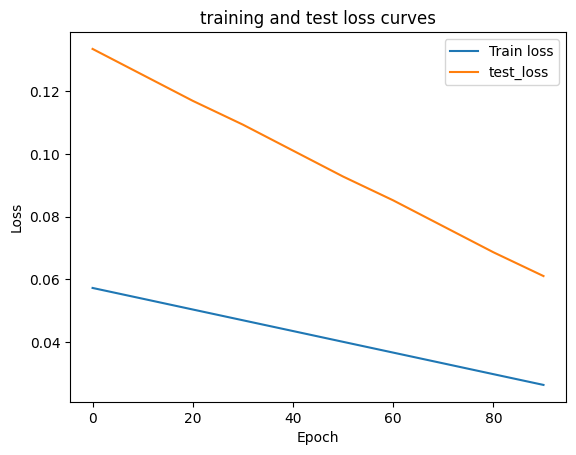

In [65]:
# plot of loss curve
plt.plot(epoch_count,np.array(torch.tensor(train_loss).cpu().numpy()),label="Train loss")
plt.plot(epoch_count,np.array(torch.tensor(Test_loss).cpu().numpy()),label="test_loss")
plt.title("training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()


In [66]:
with torch.inference_mode():
    y_preds_new = Model_0(X_test)

Model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])),
             ('bias', tensor([0.1288])),
             ('linear.weight', tensor([[0.5857]])),
             ('linear.bias', tensor([0.3478]))])

In [ ]:
# saving pytorch model

from pathlib import Path

Model_path = Path("models")
Model_path.mkdir(parents=True,exist_ok=True)
Model_save_path = Model_path / Model_Name